<a href="https://colab.research.google.com/github/SamiHaddouti/Machine-Learning-Project/blob/main/DataExploration_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow
!pip install pickle5

In [16]:
import seaborn as sb
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
import numpy as np
import pickle5 as pickle
import random

In [28]:
# Change!!!! to new Github
runs_df = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/runs.csv')
final_df = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/final_df.csv')
X_train = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/y_train.csv').values.ravel()
X_val = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/X_val.csv')
y_val = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/y_val.csv').values.ravel()
X_test = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/SamiHaddouti/Machine-Learning-Project/main/data/output/y_test.csv').values.ravel()
ml_run = 'https://github.com/SamiHaddouti/Machine-Learning-Project/blob/main/mlruns.zip'

In [ ]:
!wget https://github.com/SamiHaddouti/Machine-Learning-Project/raw/main/mlruns.zip

!unzip /content/mlruns.zip

In [5]:
def eval_model(y_val, y_pred):
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    metrics = {
        "mae" : mae,
        "mse" : mse,
        "rmse" : rmse,
        "r2" : r2
        }

    return metrics

run_id = 'ed0dd55d46d74016bb86835c04de4acc'
#loaded_model = mlflow.pyfunc.load_model(f"runs:/{run_id}/final_model")
#loaded_model = mlflow.sklearn.load_model(f"runs:/{run_id}/final_model")
loaded_model = pickle.load(open(f'mlruns/1/{run_id}/artifacts/final_model/model.pkl', 'rb'))

# get importance
importance = loaded_model.feature_importances_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

importances = pd.Series(loaded_model.feature_importances_,index=X_val.columns)

print(importances)



y_pred = loaded_model.predict(X_val)
metrics = eval_model(y_val, y_pred)
print(metrics)


[0.24481445 0.05323156 0.02638074 0.10854471 0.12261852 0.08533094
 0.21796189 0.07945044 0.02965911 0.03200764]
Feature: 0, Score: 0.24481
Feature: 1, Score: 0.05323
Feature: 2, Score: 0.02638
Feature: 3, Score: 0.10854
Feature: 4, Score: 0.12262
Feature: 5, Score: 0.08533
Feature: 6, Score: 0.21796
Feature: 7, Score: 0.07945
Feature: 8, Score: 0.02966
Feature: 9, Score: 0.03201
SuburbClass              0.244814
Rooms                    0.053232
Bathroom                 0.026381
Distance                 0.108545
Latitude                 0.122619
Longitude                0.085331
BuildingArea             0.217962
Landsize                 0.079450
HouseAgeType_historic    0.029659
HouseAgeType_modern      0.032008
dtype: float64
{'mae': 147051.60641579307, 'mse': 50931949720.597534, 'rmse': 225681.07966907092, 'r2': 0.8169223043979041}


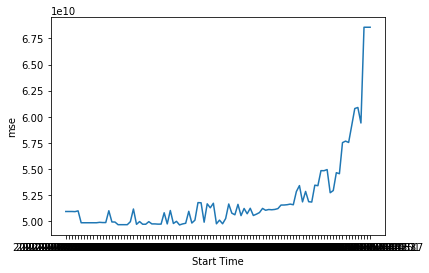

In [6]:
sb.lineplot(data=runs_df, x='Start Time', y='mse')

In [27]:

def select_random_pred(n):
  indices = random.sample(range(0, len(X_val)), n)
  tb_predicted = X_val.iloc[indices]
  print(tb_predicted)
select_random_pred(5)


     SuburbClass  Rooms  Bathroom  Distance  Latitude  Longitude  \
212            1      2       2.0       2.7 -37.83554  144.97956   
639            3      3       2.0       9.9 -37.72150  144.92510   
642            1      3       1.0      13.9 -37.91130  145.07650   
264            1      3       2.0       7.5 -37.83370  145.04690   
9              3      2       1.0       6.4 -37.79680  144.88870   

     BuildingArea  Landsize  HouseAgeType_historic  HouseAgeType_modern  
212         133.0     187.0                      1                    0  
639         110.0     294.0                      1                    0  
642         122.0     686.0                      1                    0  
264         228.0     646.0                      0                    1  
9            90.0     253.0                      1                    0  


In [34]:
def calc_prob(row):
  b_area_compare = row['BuildingArea'] / final_df['BuildingArea'].mean() 
  distance_compare = row['Distance'] - final_df['Distance'].mean() 
  rooms_compare = row['Rooms'] - round(final_df['Rooms'].mean(), 0)
  print(b_area_compare)
  print(distance_compare)
  print(rooms_compare)

calc_prob(X_val.iloc[5])


1.3655686786652999
12.714607629966427
0.8806088159715357
SuburbClass                3.00000
Rooms                      4.00000
Bathroom                   2.00000
Distance                  23.50000
Latitude                 -37.90880
Longitude                145.26319
BuildingArea             196.00000
Landsize                 725.00000
HouseAgeType_historic      0.00000
HouseAgeType_modern        1.00000
Name: 5, dtype: float64
143.52994694603674
10.785392370033573
3.0


In [ ]:
plt.figure(figsize=(25, 25))
for i in range(len(tp_idx)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[tp_idx[i]].astype('uint8'))
    plt.title('True: {}\nPred: {}\nType: {}'.format('Site', 'Site', types[tp_idx[i]]))
    plt.axis('off')

# **Sample Decision Tree**

The following plot display the complexity of a sample decision tree from the random forest model.

For a more detailed view open the *'sample_tree.png'*

In [9]:
plt.figure(figsize=(200,100))  
_ = tree.plot_tree(loaded_model.estimators_[0], feature_names = X_val.columns, 
             filled=True, fontsize=6, rounded = True)
plt.savefig('sample_tree.png')
plt.show()